In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets


# pd.__version__

In [2]:
# data = pd.read_csv("All Easytool Monsters - Raw Data.csv")
raw_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pf2e AC/All Easytool Monsters - Raw Data.csv")
raw_data

,name,Creature Level,Source,Perception,Senses,Rarity,Alignment,Size,Trait 1,Trait 2,...,Attack 4,Attack 5,Attack 6,Attack 7,Spells 1,Spells 2,Spells 3,Reaction 1,Reaction 2,Reaction 3
0,ABANDONED ZEALOT,6,Bestiary 3,14,"Darkvision, Lifesense 60 feet (page 305), sens...",Common,Chaotic Evil,Medium,Incorporeal,Spirit,...,NaN,NaN,NaN,NaN,Divine Innate Spells DC 24; 6th zealous convic...,NaN,NaN,"Elegy of the Faithless (abjuration, magical tr...",NaN,NaN
1,ADLET,10,Bestiary 3,18,"Low-Light Vision, Scent (imprecise) 30 feet",Common,Chaotic Neutral,Medium,Cold,Humanoid,...,"You can throw this weapon as a ranged attack, ...",NaN,NaN,NaN,NaN,NaN,NaN,Avenging Bite Trigger A creature within reach ...,NaN,NaN
2,ARBITER,1,Bestiary,7,"Darkvision, detect alignment (chaotic only), l...",Common,Neutral,Tiny,Aeon,Inevitable,...,NaN,NaN,NaN,NaN,Divine Innate Spells DC 17; 4th read omens; 1s...,NaN,NaN,NaN,NaN,NaN
3,THELETOS,7,Bestiary 2,18,Darkvision,Common,Neutral,Medium,Aeon,Monitor,...,NaN,NaN,NaN,NaN,"Divine Innate Spells DC 25, attack +17; 4th au...",NaN,NaN,NaN,NaN,NaN
4,AXIOMITE,8,Bestiary,19,Darkvision,Common,Neutral,Medium,Aeon,Monitor,...,NaN,NaN,NaN,NaN,"Divine Innate Spells DC 27, attack +17; 5th te...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,SKARJA,13,Extinction Curse - 03 - Lifee28099s Long Shadows,25,"detect alignment, detect magic",Unique,Neutral Evil,Medium,Fiend,Hag,...,NaN,NaN,NaN,NaN,"Occult Innate Spells DC 33, attack +25; 9th bi...",NaN,NaN,NaN,NaN,NaN
2284,THESSEKKA,14,Extinction Curse - 03 - Lifee28099s Long Shadows,26,"Darkvision, Tremorsense (imprecise) 30 feet",Unique,Chaotic Evil,Medium,Humanoid,Xulgath,...,NaN,NaN,NaN,NaN,Primal Innate Spells DC 34; 4th shape stone,NaN,NaN,NaN,NaN,NaN
2285,ZOMBIE GRINDYLOW,0,#2-06: The Crashing Wave,5,Darkvision,Uncommon,Neutral Evil,Small,Amphibious,Mindless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2286,FEROCIOUS ZOMBIE GRINDYLOWS,2,#2-06: The Crashing Wave,7,Darkvision,Uncommon,Neutral Evil,Small,Amphibious,Mindless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data.columns

Index(['name', 'Creature Level', 'Source', 'Perception', 'Senses', 'Rarity',
       'Alignment', 'Size', 'Trait 1', 'Trait 2', 'Trait 3', 'Trait 4',
       'Trait 5', 'Trait 6', 'Trait 7', 'Language 1', 'Language 2',
       'Language 3', 'Language 4', 'Language 5', 'Language 6', 'Language 7',
       'Language 8', 'Language 9', 'Language 10', 'Language 11', 'Language 12',
       'Language 13', 'Language 14', 'Language 15', 'Strength', 'Dexterity',
       'Constitution', 'Intelligence', 'Wisdom', 'Charisma', 'Acrobatics',
       'Arcana', 'Athletics', 'Crafting', 'Deception', 'Diplomacy',
       'Intimidation', 'Medicine', 'Nature', 'Occultism', 'Performance',
       'Religion', 'Society', 'Stealth', 'Survival', 'Thievery', 'HP', 'AC',
       'Fort', 'Ref', 'Will', 'Immunities', 'Resistances', 'Weaknesses',
       'Speed', 'Attack 1', 'Attack 2', 'Attack 3', 'Attack 4', 'Attack 5',
       'Attack 6', 'Attack 7', 'Spells 1', 'Spells 2', 'Spells 3',
       'Reaction 1', 'Reaction 2', 'Reac

In [4]:
attack_columns = ["Attack " + str(x) for x in range(1, 8)]
creature_columns = ["name", "Creature Level", "HP", "AC"]
# print(attack_columns)


In [5]:
data = raw_data[creature_columns + attack_columns]
data[["name", "Attack 1"]]

,name,Attack 1
0,ABANDONED ZEALOT,"Melee hand of despair +16 (finesse, magical), ..."
1,ADLET,"Melee spear +20 (magical), Damage 2d6+9 pierci..."
2,ARBITER,"Melee shortsword +9 (agile, finesse, lawful, m..."
3,THELETOS,"Melee fist +17 (lawful, magical), Damage 2d10+..."
4,AXIOMITE,"Melee warhammer +20 (lawful, magical, shove), ..."
...,...,...
2283,SKARJA,"Melee jaws +26 (magical), Damage 3d8+9 piercin..."
2284,THESSEKKA,"Melee jaws +28, Damage 3d8+12 piercing"
2285,ZOMBIE GRINDYLOW,NaN
2286,FEROCIOUS ZOMBIE GRINDYLOWS,"Melee tentacle +10 (agile, finesse, trip) Dama..."


In [6]:
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2288 non-null   object
 1   Creature Level  2288 non-null   int64 
 2   HP              2288 non-null   int64 
 3   AC              2288 non-null   int64 
 4   Attack 1        2221 non-null   object
 5   Attack 2        1616 non-null   object
 6   Attack 3        840 non-null    object
 7   Attack 4        362 non-null    object
 8   Attack 5        140 non-null    object
 9   Attack 6        37 non-null     object
 10  Attack 7        12 non-null     object
dtypes: int64(3), object(8)
memory usage: 196.8+ KB


In [7]:
data_not_attacker = data[data["Attack 1"].isna()]
data_not_attacker

,name,Creature Level,HP,AC,Attack 1,Attack 2,Attack 3,Attack 4,Attack 5,Attack 6,Attack 7
46,ANIMATED SILVERWARE,1,14,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ARMY ANT SWARM,5,55,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,VAMPIRE BAT SWARM,1,11,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,BEE SWARM,1,18,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,YOUNG BLOODSEEKER SWARM,3,30,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2206,TOXIC LAIR WIZARD SPONGE,5,65,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,UNDERWATER WIZARD SPONGE,5,65,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2208,WIZARD SPONGE,5,65,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2267,SHAMBLER TROOP,4,90,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creatures that don't have attack are:
* Swarms
* Troops
* Creatures like Stone Lion (has damage dealing actions, but not attacks)
* Creatures like Unseen Servant (doesn't have any attack or damage dealing actions/spells)

There is also a noted mistake with Zombie Grindylow. In the data it does not have an attack, while in [Pathfinder 2 easy](https://pf2easy.com/index.php?id=10472&name=zombie_grindylow) it has.

Let's delete creatures without attacks

In [8]:
data = data.dropna(how = "all", subset = attack_columns)
# Delete rows with all None Attacks 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 0 to 2287
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2221 non-null   object
 1   Creature Level  2221 non-null   int64 
 2   HP              2221 non-null   int64 
 3   AC              2221 non-null   int64 
 4   Attack 1        2221 non-null   object
 5   Attack 2        1616 non-null   object
 6   Attack 3        840 non-null    object
 7   Attack 4        362 non-null    object
 8   Attack 5        140 non-null    object
 9   Attack 6        37 non-null     object
 10  Attack 7        12 non-null     object
dtypes: int64(3), object(8)
memory usage: 208.2+ KB


In [10]:
def read_attack_string (s):
  '''
  Read the string of attack feild.
  INPUT: str
    - s: string from attack
  OUTPUT: tuple 
    - at_type: attack type, Melee or Range
    - hit_bonus: bonus to attack
    - is_agile: bool, is it that attack agile
  '''
  # if s is Empty (None) return None
  if not s:
    return None

  # Read type of attack
  at_type = re.match('(Melee|Range)', s)
  # If the string don't start with Melee or Range return None
  if not at_type:
    return None
  at_type = at_type.group()

  # Retunr None of there is no Damage 
  # (since if not it is probably is not an usual Strike attack)
  if s.find(", Damage") == -1:
    return None


  # Read attack bonus
  hit_bonus = re.search( "(\+|-)\d+(,| \()", s)
  # If there is no hit bonus return None
  if not hit_bonus:
    return None  
  hit_bonus = int(hit_bonus.group()[0:-1])
  
  # Is this attack agile 
  is_agile = bool(re.search("agile", s))

  return (at_type, hit_bonus, is_agile)





In [11]:

# Melt Attacks into two Columns
data = data.melt(
    id_vars = creature_columns,
    ignore_index = False,
    var_name = "Attack_Num",
    value_name = "Attack_Descr"
  )


In [12]:
# Rename Columns
data = data.rename(columns = {"name": "Name", "Creature Level": "Lvl"})
# Drop NaN Attack_Descr
data = data.dropna(subset = ["Attack_Descr"])
# Sort by name and then Attack_Num
data = data.sort_values(['Attack_Num', 'Name'])
# Reset Index
data = data.reset_index(drop = True)

In [13]:
data 

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr
0,AADRUSHIAN,13,275,33,Attack 1,"Melee spiked chain +27 (disarm, reach 10 feet,..."
1,AAPOPH SERPENTFOLK,3,60,18,Attack 1,"Melee scimitar +11 (forceful, sweep), Damage 1..."
2,AASIMAR,5,73,23,Attack 1,"Melee longsword +15 (versatile P), Damage 1d8+..."
3,ABANDONED ZEALOT,6,75,22,Attack 1,"Melee hand of despair +16 (finesse, magical), ..."
4,ABBERTON RUFFIANS,-1,8,13,Attack 1,"Melee dagger +7 (agile, thrown 10 feet, versat..."
...,...,...,...,...,...,...
5223,MELEEKA SANVARA,2,30,18,Attack 7,Mastered Rain of Embers Stance (stance) Requir...
5224,MELEEKA SANVARA,4,60,21,Attack 7,Mastered Rain of Embers Stance (stance) Requir...
5225,MULVENTOK,7,115,24,Attack 7,"You can throw this weapon as a ranged attack, ..."
5226,SPAWN OF DAHAK,8,135,27,Attack 7,"You can throw this weapon as a ranged attack, ..."


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          5228 non-null   object
 1   Lvl           5228 non-null   int64 
 2   HP            5228 non-null   int64 
 3   AC            5228 non-null   int64 
 4   Attack_Num    5228 non-null   object
 5   Attack_Descr  5228 non-null   object
dtypes: int64(3), object(3)
memory usage: 245.2+ KB


In [15]:
attack_df = pd.DataFrame(data["Attack_Descr"].apply(read_attack_string).tolist())

In [16]:
attack_df.info()
attack_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4462 non-null   object 
 1   1       4462 non-null   float64
 2   2       4462 non-null   object 
dtypes: float64(1), object(2)
memory usage: 122.7+ KB


,0,1,2
0,Melee,27.0,False
1,Melee,11.0,False
2,Melee,15.0,False
3,Melee,16.0,False
4,Melee,7.0,True
...,...,...,...
5223,None,NaN,None
5224,None,NaN,None
5225,None,NaN,None
5226,None,NaN,None


In [17]:
data[["Attack_Type", "Hit_Bonus", "is_Agile"]] = attack_df

In [18]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5228 non-null   object 
 1   Lvl           5228 non-null   int64  
 2   HP            5228 non-null   int64  
 3   AC            5228 non-null   int64  
 4   Attack_Num    5228 non-null   object 
 5   Attack_Descr  5228 non-null   object 
 6   Attack_Type   4462 non-null   object 
 7   Hit_Bonus     4462 non-null   float64
 8   is_Agile      4462 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 367.7+ KB


/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
0,AADRUSHIAN,13,275,33,Attack 1,"Melee spiked chain +27 (disarm, reach 10 feet,...",Melee,27.0,False
1,AAPOPH SERPENTFOLK,3,60,18,Attack 1,"Melee scimitar +11 (forceful, sweep), Damage 1...",Melee,11.0,False
2,AASIMAR,5,73,23,Attack 1,"Melee longsword +15 (versatile P), Damage 1d8+...",Melee,15.0,False
3,ABANDONED ZEALOT,6,75,22,Attack 1,"Melee hand of despair +16 (finesse, magical), ...",Melee,16.0,False
4,ABBERTON RUFFIANS,-1,8,13,Attack 1,"Melee dagger +7 (agile, thrown 10 feet, versat...",Melee,7.0,True
...,...,...,...,...,...,...,...,...,...
5223,MELEEKA SANVARA,2,30,18,Attack 7,Mastered Rain of Embers Stance (stance) Requir...,None,NaN,None
5224,MELEEKA SANVARA,4,60,21,Attack 7,Mastered Rain of Embers Stance (stance) Requir...,None,NaN,None
5225,MULVENTOK,7,115,24,Attack 7,"You can throw this weapon as a ranged attack, ...",None,NaN,None
5226,SPAWN OF DAHAK,8,135,27,Attack 7,"You can throw this weapon as a ranged attack, ...",None,NaN,None


In [19]:
data = data.dropna().reset_index(drop = True)

In [20]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4462 non-null   object 
 1   Lvl           4462 non-null   int64  
 2   HP            4462 non-null   int64  
 3   AC            4462 non-null   int64  
 4   Attack_Num    4462 non-null   object 
 5   Attack_Descr  4462 non-null   object 
 6   Attack_Type   4462 non-null   object 
 7   Hit_Bonus     4462 non-null   float64
 8   is_Agile      4462 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 313.9+ KB


,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
0,AADRUSHIAN,13,275,33,Attack 1,"Melee spiked chain +27 (disarm, reach 10 feet,...",Melee,27.0,False
1,AAPOPH SERPENTFOLK,3,60,18,Attack 1,"Melee scimitar +11 (forceful, sweep), Damage 1...",Melee,11.0,False
2,AASIMAR,5,73,23,Attack 1,"Melee longsword +15 (versatile P), Damage 1d8+...",Melee,15.0,False
3,ABANDONED ZEALOT,6,75,22,Attack 1,"Melee hand of despair +16 (finesse, magical), ...",Melee,16.0,False
4,ABBERTON RUFFIANS,-1,8,13,Attack 1,"Melee dagger +7 (agile, thrown 10 feet, versat...",Melee,7.0,True
...,...,...,...,...,...,...,...,...,...
4457,CHARAU-KA ACOLYTE OF ANGAZHAN,3,45,19,Attack 6,"Ranged thrown debris +11 (deadly d6, thrown 20...",Range,11.0,False
4458,CHARAU-KA WARRIOR,1,18,18,Attack 6,"Ranged dagger +8 (agile, deadly d6, thrown 10 ...",Range,8.0,True
4459,CLOCKWORK AMALGAM,20,455,43,Attack 6,"Ranged spike +35 (magical, range increment 40 ...",Range,35.0,False
4460,JAHSI,8,135,28,Attack 6,"Ranged silver dagger +19 (agile, magical, thro...",Range,19.0,True


In [21]:
data[data.Name == "LENG SPIDER"]

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
1138,LENG SPIDER,13,235,34,Attack 1,"Melee web war flail +27 (disarm, magical, reac...",Melee,27.0,False
2948,LENG SPIDER,13,235,34,Attack 2,"Melee fangs +27 (reach 10 feet), Damage 3d12+1...",Melee,27.0,False
3955,LENG SPIDER,13,235,34,Attack 3,"Melee leg +27 (agile, reach 10 feet), Damage 3...",Melee,27.0,True
4333,LENG SPIDER,13,235,34,Attack 4,"Ranged web bola +28 (magical, nonlethal, range...",Range,28.0,False


So there is a problem that can be seen, for example, with "LENG SPIDER". It has few attacks. One of them (Attack 6) is **NOT** a Strike attack. But it goes threw the regex. Attack description: 

_"Ranged Trip A Leng spider can use a web bola to trip a target with the Athletics skill. The skill check takes a -2 circumstance penalty. A web bola deals no damage when used to trip."_

Since it has the word "Renged" at the start and has a number with - sign in front of it it pass threw regex as Ranged non Agile attack with Hit Bonus -2. 

**To Do (ALREADY DONE):**
* Think how to catch that. Probably add the check that the description has the word "Damage"
* Now I am thinking that probably better will be to add check on ", Damage"

<Axes: xlabel='Hit_Bonus', ylabel='Count'>

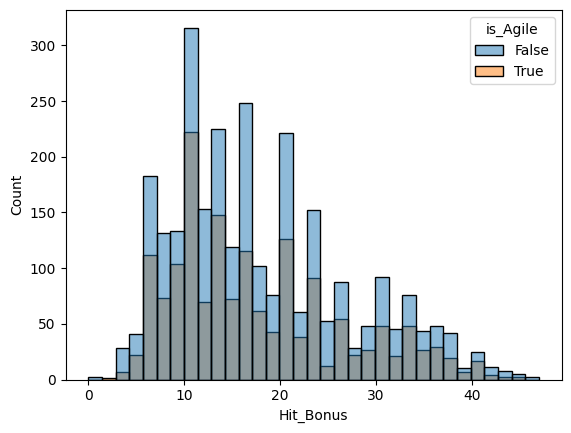

In [22]:
sns.histplot(data = data, hue = "is_Agile", x = "Hit_Bonus")

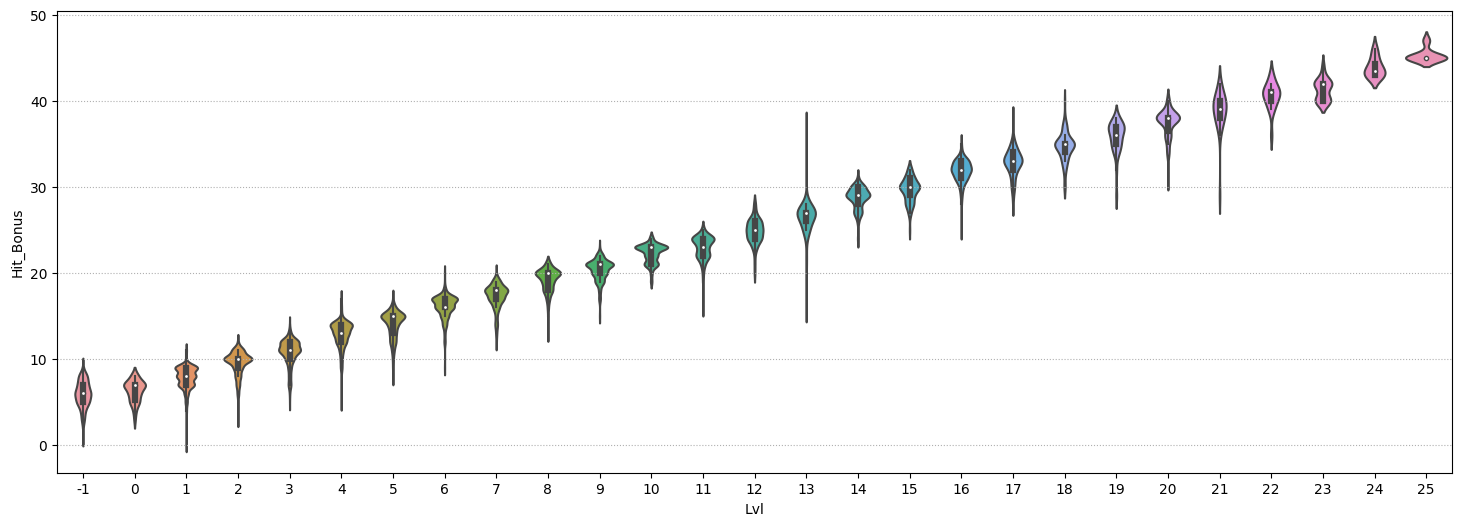

In [23]:
plt.figure(figsize=(18,6))
sns.violinplot(data = data, x = "Lvl", y = "Hit_Bonus")
plt.grid(axis = 'y', linestyle = ':')

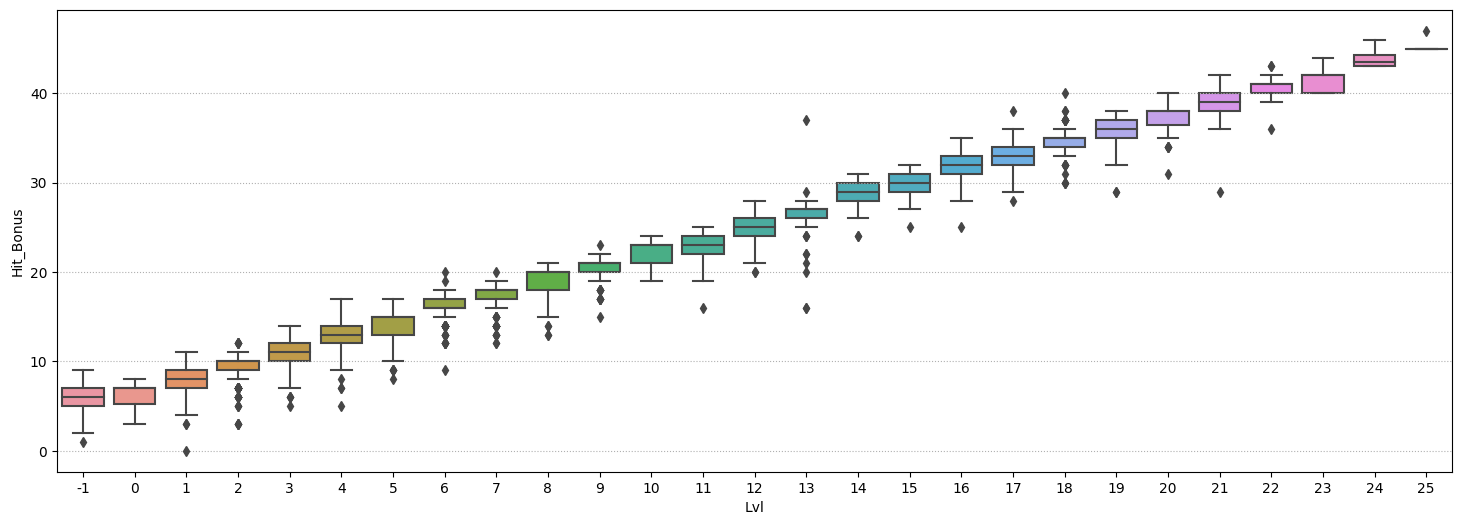

In [24]:
plt.figure(figsize=(18,6))
sns.boxplot(data = data, x = "Lvl", y = "Hit_Bonus")
plt.grid(axis = 'y', linestyle = ':')

<Axes: xlabel='Hit_Bonus', ylabel='Count'>

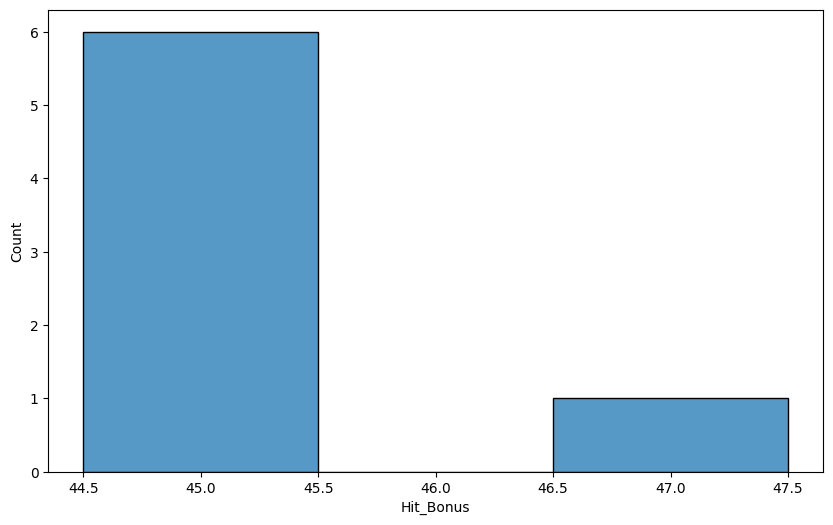

In [25]:
lvl = 25
plt.figure(figsize=(10,6))
sns.histplot(data = data[data.Lvl == lvl], x = 'Hit_Bonus', binwidth=1, binrange= (44.5, 47.5))

## Incpection of certian attacks

In [26]:
# data[data.Lvl == 10].Hit_Bonus.min() # min  hit bonus 1
# data[(data.Hit_Bonus == 1) & (data.Lvl == 10)] # ANDERA PALDREEN
data[data.Name == "ANDERA PALDREEN"] 

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
95,ANDERA PALDREEN,10,175,30,Attack 1,"Melee +1 striking falchion +22 (forceful, swee...",Melee,22.0,False


+1 striking falchion. The weapon has +1 striking rune, the script things that +1 is for hit bonus. The attack description is

_"Melee +1 striking falchion +22 (forceful, sweep), Damage 2d10+7 slashing"_

**TO DO:**
- [x] fix this problem

In [27]:
data[data.Lvl == 16].Hit_Bonus.min() # min  hit bonus 10
data[(data.Hit_Bonus == 10) & (data.Lvl == 16)] # ZINOGYVAZ
data[data.Name == "ZINOGYVAZ"]

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
2170,ZINOGYVAZ,16,240,39,Attack 1,"Melee fangs +32, Damage 4d6+15 piercing plus G...",Melee,32.0,False


A mistake. Nontheless, the script read d10 as +10 hit bonus.

The attack description:

_"Ranged composite shortbow (deadly d10, magical, propulsive, range increment 60 feet, reload 0), Damage 3d6+13 piercing"_

**TO DO:**
- [x] Script should ignore strings as d10 but at the same time shuld not read damage as hit bonus (in this example 3d6+13 should be read as +13 hit bonus)

In [28]:
# data[data.Lvl == 11].Hit_Bonus.min() # min  hit bonus 10
# data[(data.Hit_Bonus == 10) & (data.Lvl == 11)] # HEZROU
data[data.Name == "HEZROU"]

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
930,HEZROU,11,245,31,Attack 1,"Melee jaws (evil, magical, reach 10 feet) +24,...",Melee,24.0,False
2813,HEZROU,11,245,31,Attack 2,"Melee claw (agile, evil, magical, reach 10 fee...",Melee,24.0,True


The other problem: the hit bonus is after the attack properties. One of the attack properties is "reach 10 feet" that is read as +10 hit bonus

**To Do:**
 - [x] fix this problem
 - [x] look at the sheets implementation (it has the same mistake that I had!)

In [29]:
# data[data.Lvl == 1].Hit_Bonus.min() # min  hit bonus 10
# data[(data.Hit_Bonus == 0) & (data.Lvl == 1)] # WARBAL BUMBLEBRASHER
data[data.Name == "WARBAL BUMBLEBRASHER"]

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
2032,WARBAL BUMBLEBRASHER,1,20,15,Attack 1,"Melee fist +5 (agile, finesse, nonlethal, unar...",Melee,5.0,True
3548,WARBAL BUMBLEBRASHER,1,20,15,Attack 2,"Melee heavy book +0, Damage 1d-1 bludgeoning",Melee,0.0,False
4179,WARBAL BUMBLEBRASHER,1,20,15,Attack 3,"Ranged heavy book +3 (thrown 10 feet), Damage ...",Range,3.0,False


Looks like the only one creature with attack +0. What is noticable is the fact that the is seems not to be hit modefier less then 0 and the fact that hit modifire written as +0

### The Fix
The fix is to change old regex "(+|-)?\d+" to the new " (\+|-)\d+". Is still doesn't change the problem with +1 weapons. 

What CAN fix that is regex " (\+|-)\d+(,| \()". but in needs deletion of the last letter. 

### Inspection
Lets inpect other outliners
Lvl 13 min/max, Lvl 21 min

In [30]:
data[data.Lvl == 13].Hit_Bonus.min() # min  hit bonus 16
data[(data.Hit_Bonus == 16) & (data.Lvl == 13)] # BARKING STAG
data[data.Name == "BARKING STAG"]

# LOOKS OK

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
191,BARKING STAG,13,245,34,Attack 1,"Melee antler +16 (grapple), Damage 3d10+12 pie...",Melee,16.0,False
2335,BARKING STAG,13,245,34,Attack 2,"Melee hoof +16, Damage 3d8+12 bludgeoning",Melee,16.0,False


In [31]:
data[data.Lvl == 13].Hit_Bonus.max() # max  hit bonus 37
data[(data.Hit_Bonus == 37) & (data.Lvl == 13)] # STORM GIANT
data[data.Name == "STORM GIANT"]

# Looks OK

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
1809,STORM GIANT,13,235,34,Attack 1,"Melee greatsword +28 (magical, reach 15 feet, ...",Melee,28.0,False
3384,STORM GIANT,13,235,34,Attack 2,"Melee fist +27 (agile, reach 15 feet), Damage ...",Melee,27.0,True
4379,STORM GIANT,13,235,34,Attack 4,"Ranged rock +37 (brutal, range increment 120 f...",Range,37.0,False


In [32]:
data[data.Lvl == 21].Hit_Bonus.min() # min  hit bonus 29
data[(data.Hit_Bonus == 29) & (data.Lvl == 21)] # CHAOS GULGAMODH
data[data.Name == "CHAOS GULGAMODH"]

# Looks OK!!!

,Name,Lvl,HP,AC,Attack_Num,Attack_Descr,Attack_Type,Hit_Bonus,is_Agile
364,CHAOS GULGAMODH,21,400,46,Attack 1,"Melee massive scythe +38 (deadly 4d10, magical...",Melee,38.0,False
2445,CHAOS GULGAMODH,21,400,46,Attack 2,"Melee cannon arm +38 (chaotic, magical, reach ...",Melee,38.0,False
3776,CHAOS GULGAMODH,21,400,46,Attack 3,"Melee foot +40 (chaotic, magical, reach 20 fee...",Melee,40.0,False
4284,CHAOS GULGAMODH,21,400,46,Attack 4,Ranged magical tradition: arcane Arcane spellc...,Range,29.0,False


In [39]:
data.to_csv("cleaned_data.csv")

## Result
The final regex seems to be the perfect fit. Now we can work on widgets

# Widgets
So widgets. Ideas
- [ ] Histogram of the hit bonuses based on level (range of levels)

# Widgets Tests


In [5]:
def linear_func(slope,intercept):
  plt.figure(2)
  x = np.linspace(-10,10,num=1000)
  plt.ylim(-10,10)
  plt.axvline(color='black')
  plt.axhline(color='black')
  plt.plot(x, slope * x + intercept, lw=5,color='red')
  plt.grid()
  plt.show()

interactive_plot = widgets.interactive(linear_func,slope=(-5.0,5.0),intercept=(-5.0,5.0))
output = interactive_plot.children[-1]
interactive_plot
     

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

# Unnecesery
Seperate DF into two:

Creatures table

| creature_id | name | lvl | hp | ac |
|-------------|------|-----|----|----|
|             |      |     |    |    |

Attacks table

| creature_id | attack_type | hit_bonus | is_agile |
|-------------|-------------|-----------|----------|
|             |             |           |          |


In [ ]:
creature_df = data[creature_columns].rename(columns = lambda x: x.replace(" ", "_"))
creature_df

KeyError: ignored

In [ ]:


attack_df = data.melt(
    id_vars = creature_columns,
    ignore_index = False,
    var_name = "Attack_Num",
    value_name = "Attack_Descr"
  )[["Attack_Num", "Attack_Descr"]]

attack_df = attack_df \
.reset_index() \
.rename(
    columns = {"index": "Creature_Id"}
).drop(
    columns = "Attack_Num"
).dropna(
    subset = ["Attack_Descr"]
).reset_index(
    drop = True
)

attack_df = attack_df.join(
  pd.DataFrame(
      attack_df \
      .Attack_Descr \
      .apply(read_attack_string) \
      .tolist(), \
      index = attack_df.index
  ).rename(
      columns = {0: "Attack_Type", 1: "Hit_Bonus", 2: "is_Agile"}
  )
)

attack_df = attack_df.dropna().reset_index(drop = True)

In [ ]:
attack_df.dtypes
# attack_df.info()
# let's change types for Hit_Bonus (to int) and is_Agile (to bool) and drop Description

In [ ]:
attack_df = attack_df.astype(
    {"Attack_Type": 'category', 
     "Hit_Bonus": 'int32', 
     "is_Agile": 'bool'}
     ).drop(
         columns = "Attack_Descr"
      )

In [ ]:
attack_df.dtypes
attack_df.describe(include = "all")


In [ ]:
sns.histplot(data = attack_df, hue = "is_Agile", x = "Hit_Bonus")

In [ ]:
creature_df.dtypes
creature_df.info()

In [ ]:
creature_df = creature_df.drop(columns = "Creature_Id")

In [ ]:
creature_df = creature_df.reset_index().rename(columns = {"index": "Creature_Id"})
merged_df = creature_df.merge(attack_df)

In [ ]:
merged_df

In [ ]:
plt.figure(figsize=(18,6))
sns.violinplot(data = merged_df, x = "Creature_Level", y = "Hit_Bonus")
plt.grid(axis = 'y', linestyle = ':')

In [ ]:
merged_df[merged_df["Creature_Level"] == -1].sort_values("Hit_Bonus")
# data.info()

In [ ]:
print(data.iloc[1547]["Attack 1"])
print(read_attack_string(data.iloc[1547]["Attack 1"]))